### Import dependencies

In [1]:
import numpy as np
import utils
from code_HGN_test import define_model, session_run
from os.path import isfile, exists
from preprocess4HGN import preprocess

print 'Load needed things!'

Load needed things!


### Load w2v model : it downloads if that doesn't exist

In [2]:
w2v_path = './data/GoogleNews-vectors-negative300.bin'
w2v_model = utils.load_w2v(w2v_path)

Start loading Google Word2Vec data
Finished loading Google Word2Vec data


### Load preprocessed data

In [3]:
if isfile('./data/preprocessed4HGN.npz') == False:
    preprocess()
    
npzfile = np.load('./data/preprocessed4HGN.npz')
img_idx = npzfile['arr_0']
text_inputs = npzfile['arr_2']

dim_sentence = text_inputs.shape[1]
max_step_sentence = text_inputs.shape[2]
num_data = img_idx.shape[0]

### Define Model : Run this cell only once per one kernel 

In [4]:
result_heatmap, ph_image, ph_sen, ph_sen_len, ph_dropout= define_model(dim_sentence, 
                                                                       max_step_sentence, 
                                                                       num_hg_Depth = 4,
                                                                       dim_hg_feat = 256,
                                                                       dim_rnn_cell = 256)

### Get test image index. Refer the printed result when you check the result from the test data

In [5]:
idx_test, idx_train = utils.get_test_idx(img_idx, num_data)

Test image index : [127 422  15 390  19 235 138 338  31 318 378 270 465 277  26  76 124 195
 111 445 367 189  66]


### Choose the image index for the test

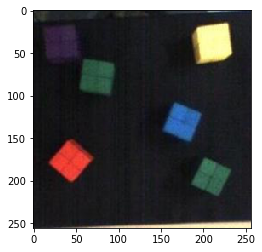

In [9]:
test_img_idx = 128
img_path = './data/train_img'
curr_test_img = utils.load_test_img(img_path, test_img_idx, img_resize=256, plot_flag = 1)

### Set test input script and Run the Result

In [13]:
curr_test_input = "pick up the right block the green one"
curr_embed_input, curr_seq_len = utils.load_test_script(curr_test_input, w2v_model, 
                                                        dim_sentence, max_step_sentence)    
mean_of_esti, uncertainty = session_run(result_heatmap, ph_image, ph_sen, 
                                         ph_sen_len, ph_dropout,
                                         restore_path = "./trained_HGN/model.ckpt-150",
                                         curr_embed_input = curr_embed_input,
                                         curr_seq_len = curr_seq_len,
                                         curr_test_img = curr_test_img)

Ready the test input script
INFO:tensorflow:Restoring parameters from ./trained_HGN/model.ckpt-150


### See the Result

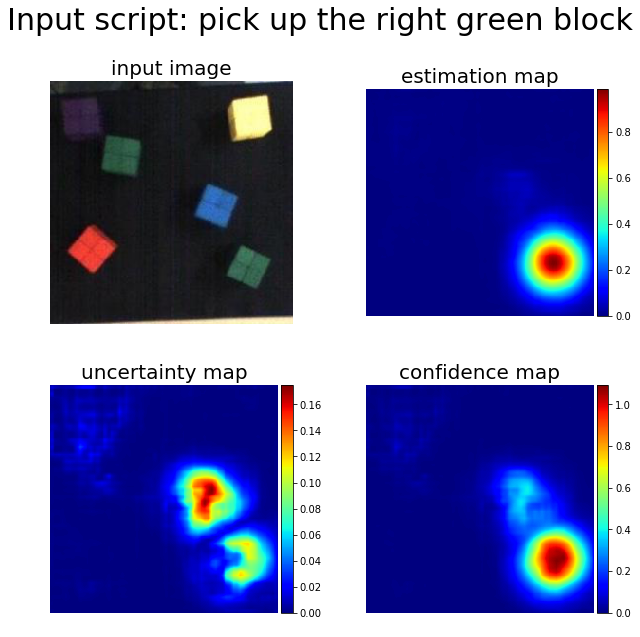

In [15]:
utils.plot_HGN_result(curr_test_input, curr_test_img, mean_of_esti, uncertainty)